1. Найти экстремумы. <br>
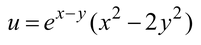

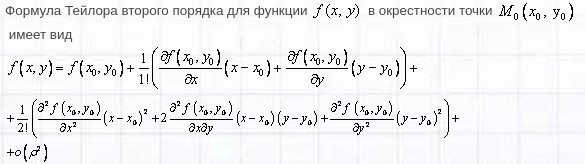

In [347]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from matplotlib import cm
from sympy import *

x, y = symbols('x, y', real=True)

z = exp(x - y) * (x**2 - 2 * y**2)

print('Уравнение поверхности: z = ',z)

# Производные первого порядка по x и y
z_d_x = diff(z, x, 1)
z_d_y = diff(z, y, 1)

print('\nЧастная производная по x:\n', z_d_x)
print('\nЧастная производная по y:\n', z_d_y)

# Выражаем y из z_d_x и подставляем в z_d_y
z_d_y1 = z_d_y.subs([(y, solve(z_d_x, y)[0])])
z_d_y2 = z_d_y.subs([(y, solve(z_d_x, y)[1])])

# print('\ny из частной производной по x: ', solve(z_d_x, y))
# print('\nЧастная производная по y (подставили выражение сверху): \n', z_d_y1, '\n', z_d_y2)

# Находим координаты x стац. точек
x_stac = solve(z_d_y1, x)
# print('\nx stac ', solve(z_d_y1, x))

# Подставляем координаты x стац. точек в частн. произв. по x
# и выражаем из неё координаты точки y
y_stac1 = solve(z_d_x.subs([(x, x_stac[0])]), y)
# print('y stac 1 ', y_stac1)

y_stac2 = solve(z_d_x.subs([(x, x_stac[1])]), y)
# print('y stac 2 ', y_stac2)

p1 = Point(x_stac[0], y_stac1[0])
p2 = Point(x_stac[1], y_stac2[0])

y_stac1 = solve(z_d_y.subs([(x, x_stac[0])]), y)
# print('y stac 3 ', y_stac1)

y_stac2 = solve(z_d_y.subs([(x, x_stac[1])]), y)
# print('y stac 4 ', y_stac2)

p3 = Point(x_stac[0], y_stac1[1])
p4 = Point(x_stac[1], y_stac2[1])

print('\nСтац. точки: ')
pprint(p1)
pprint(p2)
pprint(p3)
pprint(p4)

Уравнение поверхности: z =  (x**2 - 2*y**2)*exp(x - y)

Частная производная по x:
 2*x*exp(x - y) + (x**2 - 2*y**2)*exp(x - y)

Частная производная по y:
 -4*y*exp(x - y) - (x**2 - 2*y**2)*exp(x - y)

Стац. точки: 
Point2D(-4, -2)
Point2D(0, 0)
Point2D(-4, 4)
Point2D(0, 2)


In [348]:
# Уравнения Тейлора в стац. точках (1 приближение)

p = p1

z_t1 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]))

p = p2

z_t2 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]))

p = p3

z_t3 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]))

p = p4

z_t4 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]))

print('\nПриближения Тейлора 1 порядка в стац. точках:')
print(simplify(z_t1))
print(simplify(z_t2))
print(simplify(z_t3))
print(simplify(z_t4))


Приближения Тейлора 1 порядка в стац. точках:
8*exp(-2)
0
8*(-3*x - 14)*exp(-8)
8*(-x - 1)*exp(-2)


In [349]:
# Уравнения Тейлора в стац. точках (2 приближение)

p = p1

z_t1 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

# z_t1 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 1000000 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 1000000 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# 500000 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

p = p2

z_t2 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

# z_t2 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 500000 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 500000 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# 250000 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))


p = p3

z_t3 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

# z_t3 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 5000000 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 5000000 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# 2500000 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

p = p4

z_t4 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

# z_t4 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 500000 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 500000 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# 250000 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

print('\nПриближения Тейлора 2 порядка в стац. точках:')
print(simplify(z_t1))
print(simplify(z_t2))
print(simplify(z_t3))
print(simplify(z_t4))



Приближения Тейлора 2 порядка в стац. точках:
1.0*(-3.0*x**2 + 8.0*x*y - 8.0*x - 6.0*y**2 + 8.0*y)*exp(-2)
1.0*x**2 - 2.0*y**2
1.0*(-15.0*x**2 + 8.0*x*y - 176.0*x + 6.0*y**2 - 16.0*y - 384.0)*exp(-8)
(-3.0*x**2 - 8*x + 2.0*(y - 2)**2 - 8)*exp(-2)


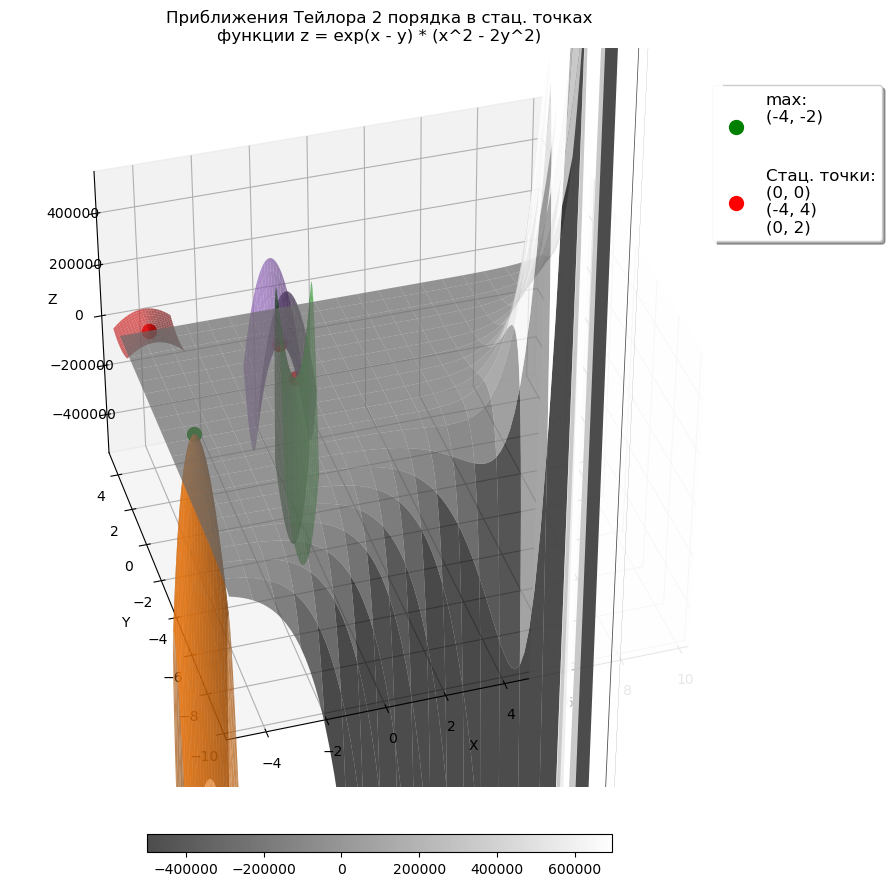

In [350]:
# построение графика

f = lambda x, y: np.exp(x - y) * (x**2 - 2 * y**2) # строим плоскость

fig = plt.figure(figsize=(12, 12)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-5, 10, 100) # разбиение для x
yval = np.linspace(-10, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

# вычисляем значения z в точках
z = f(x, y)

# строим плоскость по функции
surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7,
                        cmap=cm.gray, vmin=-500000, vmax=696577)

fig.colorbar(surf, shrink=0.5, aspect=25, orientation = 'horizontal', pad=0.05)

ax.set_zlim(-536577, 536577)
ax.set_xlim(-5, 10)
ax.set_ylim(-10, 5)

# -------------------- Taylor eq in point 1 --------------------------

f1_t = lambda x, y: (8*(-750000*(x + 4)**2 + 500000*(x + 4)*(y + 2) - 1500000*(y + 2)**2 + 1)*exp(-2))

xval = np.linspace(-5, -3, 100) # разбиение для x
yval = np.linspace(-3, -1, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f1_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7) # строим плоскость

# # -------------------- Taylor eq in point 2 --------------------------
f2_t = lambda x, y: (1000000*x**2 - 2000000*y**2)

xval = np.linspace(-0.6, 0.6, 100) # разбиение для x
yval = np.linspace(-0.6, 0.6, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f2_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7) # строим плоскость


# # -------------------- Taylor eq in point 3 --------------------------

f3_t = lambda x, y: (8*(-18750000*x**2 + 2500000*x*y - 160000003*x +
                         7500000*y**2 - 50000000*y - 220000014)*exp(-8))

xval = np.linspace(-5, -3, 100) # разбиение для x
yval = np.linspace(3, 5, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f3_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7) # строим плоскость


# # -------------------- Taylor eq in point 4 --------------------------

f3_t = lambda x, y: (8*(-375000*x**2 - x + 250000*(y - 2)**2 - 1)*exp(-2))

xval = np.linspace(-1, 1, 100) # разбиение для x
yval = np.linspace(1, 3, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f3_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7) # строим плоскость

# # --------------------------------------------------------------------

# точки на плоскости
p1 = np.array([[float(p1[0])], [float(p1[1])], [f(float(p1[0]), float(p1[1]))]])
p2 = np.array([[float(p2[0])], [float(p2[1])], [f(float(p2[0]), float(p2[1]))]])
p3 = np.array([[float(p3[0])], [float(p3[1])], [f(float(p3[0]), float(p3[1]))]])
p4 = np.array([[float(p4[0])], [float(p4[1])], [f(float(p4[0]), float(p4[1]))]])

# построение точек
ax.scatter(p1[0], p1[1], p1[2], c='green', marker='.', s=400,
            label='max:\n(-4, -2)\n\n')
ax.scatter(p2[0], p2[1], p2[2], c='red', marker='.', s=400,
            label='Стац. точки:\n(0, 0)\n(-4, 4)\n(0, 2)')
ax.scatter(p3[0], p3[1], p3[2], c='red', marker='.', s=400)
ax.scatter(p4[0], p4[1], p4[2], c='red', marker='.', s=400)

plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper left',
           borderaxespad=0.0, shadow=True, fontsize="12")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Приближения Тейлора 2 порядка в стац. точках\n'
          'функции z = exp(x - y) * (x^2 - 2y^2)')

ax.view_init(37, -107)

plt.show()

2. Исследовать заданную функцию на условный экстремум в области
неотрицательных аргументов.<br>


In [351]:
# определяем функцию
def f(x,y):
    return x*y

x, y, lamb = symbols('x y lamb')

# функция и уравнение связи
z = x*y
fi = x**2 + y**2 - 8

#Функция Лагранжа
L = z + lamb*fi

L_dx = diff(L, x)
L_dy = diff(L, y)
L_dlamb = diff(L, lamb)

# Производные фкнции Лагранжа
print('Пр-я L по x:', L_dx)
print('Пр-я L по y:', L_dy)
print('Пр-я L по lamb:', L_dlamb)

# Выразим y из L_dx
y_L_dx = solve(L_dx, y)[0]

# Подставим на место y в L_dy
# Выразим lamb из L_dy
lamb1 = solve(L_dy.subs(y, y_L_dx), lamb)[0]
lamb2 = solve(L_dy.subs(y, y_L_dx), lamb)[1]

print('lamb1 = ', lamb1)
print('lamb2 = ', lamb2)

# Подставим на место lamb в y_L_dx lamb1 и lamb2 
y_L_dx1 = y_L_dx.subs(lamb, lamb1) # x
y_L_dx2 = y_L_dx.subs(lamb, lamb2) # -x

# Найдем координаты точек x и y через lamb1 и 2
x1 = solve(L_dlamb.subs(y, y_L_dx1), x)
x2 = solve(L_dlamb.subs(y, y_L_dx2), x)

y1_1 = solve(L_dy.subs([(x, x1[0]), (lamb, lamb1)]), y)[0]
y1_2 = solve(L_dy.subs([(x, x1[1]), (lamb, lamb1)]), y)[0]

y2_1 = solve(L_dy.subs([(x, x2[0]), (lamb, lamb2)]), y)[0]
y2_2 = solve(L_dy.subs([(x, x2[1]), (lamb, lamb2)]), y)[0]

print('x1 = ', x1)
print('x2 = ', x2)

print('y1_1 = ', y1_1)
print('y1_2 = ', y2_2)
print('y2_1 = ', y2_1)
print('y2_2 = ', y2_2)

p1 = Point3D(x1[0], y1_1, f(x1[0], y1_1))
p2 = Point3D(x1[1], y1_2, f(x1[1], y1_2))
p3 = Point3D(x2[0], y2_1, f(x2[0], y2_1))
p4 = Point3D(x2[1], y2_2, f(x2[1], y2_2))

print('Стац. точки:')
print(p1)
print(p2)
print(p3)
print(p4)

det = -1*Matrix([[0, diff(fi,x), diff(fi,y)],
        [diff(fi,x), diff(L,x,2), diff(diff(L,x), y)],
        [diff(fi,y), diff(diff(L,x), y), diff(L,y,2)]]).det().subs([(x, p2[0]), (y, p2[1]), (lamb, lamb1)])

print('A = det = ', det)

if det < 0:
    print(p2, ' -- условный максимум')
else:
    print(p2, ' -- условный минимум')

Пр-я L по x: 2*lamb*x + y
Пр-я L по y: 2*lamb*y + x
Пр-я L по lamb: x**2 + y**2 - 8
lamb1 =  -1/2
lamb2 =  1/2
x1 =  [-2, 2]
x2 =  [-2, 2]
y1_1 =  -2
y1_2 =  -2
y2_1 =  2
y2_2 =  -2
Стац. точки:
Point3D(-2, -2, 4)
Point3D(2, 2, 4)
Point3D(-2, 2, -4)
Point3D(2, -2, -4)
A = det =  -64
Point3D(2, 2, 4)  -- условный максимум


Text(0.5, 0.92, 'График функции z(x,y) = xy в области x>=0, y>=0\nУравнение связи: x^2 + y2 = 8')

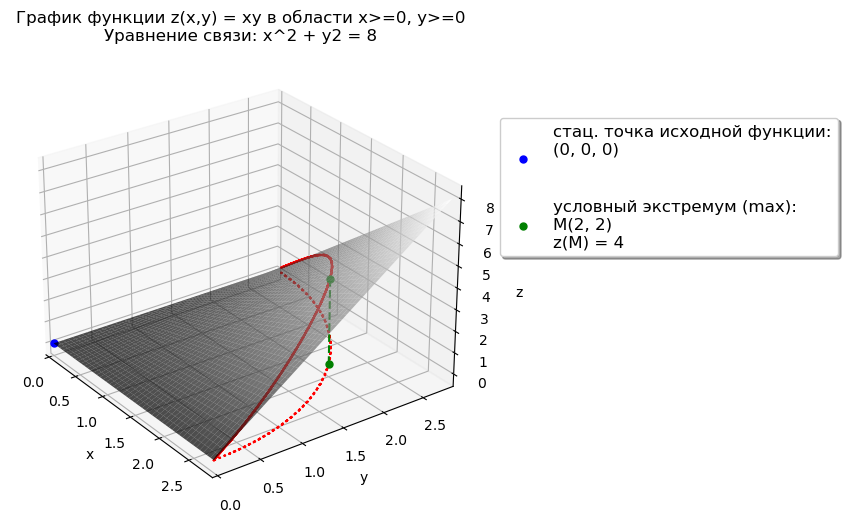

In [352]:
# Создание графика

# задаем область определения
x = np.linspace(0, np.sqrt(8), 50)
y = np.linspace(0, np.sqrt(8), 50)

# создаем сетку для графика
X,Y = np.meshgrid(x,y)

# вычисляем значения функции на сетке
Z = f(X,Y)

# создаем график
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# добавляем поверхность функции
ax.plot_surface(X, Y, Z, cmap=cm.gray, alpha=0.7)

# задаем ограничения по x и y
ax.set_xlim(0, np.sqrt(8))
ax.set_ylim(0, np.sqrt(8))

# добавляем кривую, заданную уравнением связи
t = np.linspace(0, 2*np.pi, 50)
x = np.sqrt((np.sqrt(8)*np.cos(t))**2)
y = np.sqrt((np.sqrt(8)*np.sin(t))**2)
z = f(x,y)

ax.plot(x,y,z, linestyle='-', color='r')

# добавляем проекцию кривой, заданной уравнением связи
t = np.linspace(0, 2*np.pi, 50)
x = np.sqrt((np.sqrt(8)*np.cos(t))**2)
y = np.sqrt((np.sqrt(8)*np.sin(t))**2)
z = t*0

ax.plot(x, y, z, linestyle=':', color='r')

# обозночаем экстремумы и стац. точки
ax.scatter(0, 0, 0, c='blue', marker='.', s=100,
            label='стац. точка исходной функции:\n(0, 0, 0)\n\n')

ax.scatter(p2[0], p2[1], 0, c='green', marker='.', s=100,
            label='условный экстремум (max):\nM(2, 2)\nz(M) = 4')

ax.scatter(p2[0], p2[1], p2[2], c='green', marker='.', s=100)

ax.plot([p2[0], p2[0]], [p2[1], p2[1]], [p2[2], 0], '--', color='green')


# добавляем подписи осей
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(27, -36)

plt.legend(bbox_to_anchor=(1.06, 0.85), loc='upper left',
           borderaxespad=0.0, shadow=True, fontsize="12")

# добавляем заголовок
ax.set_title('График функции z(x,y) = xy в области x>=0, y>=0'
             '\nУравнение связи: x^2 + y2 = 8')